In [1]:
import numpy as np                  
import pandas as pd                
import matplotlib.pyplot as plt    
import seaborn as sns
import mysql.connector
from mysql.connector import Error

In [3]:
def cargar_tablas_a_dataframes(host, database, user, password):
    """
    Se conecta a una base de datos MySQL y carga todas las tablas como DataFrames de Pandas
    con nombres dinámicos en el entorno global (ej. df_nombreTabla).
    """
    try:
        connection = mysql.connector.connect(
            host=host,
            database=database,
            user=user,
            password=password
        )

        if connection.is_connected():
            cursor = connection.cursor()  # Creación de un cursor para ejecutar consultas SQL
            cursor.execute("SHOW TABLES")  # Se ejecuta la consulta "SHOW TABLES" para listar las tablas

            tablas = [tabla[0] for tabla in cursor.fetchall()]  # Se obtienen los nombres de las tablas

            for tabla in tablas:
                cursor.execute(f"SELECT * FROM {tabla}")  # Se extraen los datos de cada tabla
                columnas = [columna[0] for columna in cursor.description]  # Nombres de columnas
                globals()[f'df_{tabla}'] = pd.DataFrame(cursor.fetchall(), columns=columnas)  # DataFrame dinámico
                print(f'df_{tabla}')  # Mostrar el nombre del DataFrame creado

    except Error as e:
        print("Error while connecting to MySQL:", e)  # Manejo de errores

    finally:
        if 'connection' in locals() and connection.is_connected():
            cursor.close()  # Cierra el cursor
            connection.close()  # Cierra la conexión
            print("MySQL connection is closed")  # Mensaje de cierre

In [4]:
cargar_tablas_a_dataframes('212.227.90.6', 'Equip_11', 'Equipo11', 'E1q2u3i4p5o11')

df_RRHH
MySQL connection is closed


In [6]:
df_RRHH.columns

Index(['ID', 'Reason_absence', 'Month_absence', 'Day_week', 'Seasons',
       'Transportation_expense', 'Distance_Residence_Work', 'Service_time',
       'Age', 'Work_load_Average_day', 'Hit_target', 'Disciplinary_failure',
       'Education', 'Son', 'Social_drinker', 'Social_smoker', 'Pet', 'Weight',
       'Height', 'Body_mass_index', 'Absenteeism_hours'],
      dtype='object')

In [7]:
# Muestra todas las columnas
pd.set_option('display.max_columns', None)

# Opcional: muestra todo el ancho (evita recortes por pantalla estrecha)
pd.set_option('display.width', None)

# Opcional: ajusta el ancho máximo de cada columna si es muy largo
pd.set_option('display.max_colwidth', None)

In [8]:
df_RRHH.head(15)

,ID,Reason_absence,Month_absence,Day_week,Seasons,Transportation_expense,Distance_Residence_Work,Service_time,Age,Work_load_Average_day,Hit_target,Disciplinary_failure,Education,Son,Social_drinker,Social_smoker,Pet,Weight,Height,Body_mass_index,Absenteeism_hours
0,14,11,11,2,4,155,12,14,34,"284,031",97,0,1,2,1,0,0,95,196,25,120
1,36,13,4,4,3,118,13,18,50,"239,409",98,0,1,1,1,0,0,98,178,31,120
2,9,6,7,3,1,228,14,16,58,"264,604",93,0,1,2,0,0,1,65,172,22,120
3,28,9,7,3,1,225,26,9,28,"230,290",92,0,1,1,0,0,2,69,169,24,112
4,9,12,3,3,2,228,14,16,58,"222,196",99,0,1,2,0,0,1,65,172,22,112
5,11,19,3,2,3,289,36,13,33,"222,196",99,0,1,2,1,0,1,90,172,30,104
6,36,13,6,4,3,118,13,18,50,"377,550",94,0,1,1,1,0,0,98,178,31,80
7,14,18,12,3,2,155,12,14,34,"280,549",98,0,1,2,1,0,0,95,196,25,80
8,13,13,7,2,1,369,17,12,31,"264,604",93,0,1,3,1,0,0,70,169,25,80
9,34,19,12,3,4,118,10,10,37,"261,306",97,0,1,0,0,0,0,83,172,28,64


In [6]:
df_RRHH.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       740 non-null    int64 
 1   Reason_absence           740 non-null    int64 
 2   Month_absence            740 non-null    int64 
 3   Day_week                 740 non-null    int64 
 4   Seasons                  740 non-null    int64 
 5   Transportation_expense   740 non-null    int64 
 6   Distance_Residence_Work  740 non-null    int64 
 7   Service_time             740 non-null    int64 
 8   Age                      740 non-null    int64 
 9   Work_load_Average_day    740 non-null    object
 10  Hit_target               740 non-null    int64 
 11  Disciplinary_failure     740 non-null    object
 12  Education                740 non-null    object
 13  Son                      740 non-null    object
 14  Social_drinker           740 non-null    o

## Exploratory Data Analysis

* Resúmenes estadísticos

In [7]:
df_RRHH.describe()

,ID,Reason_absence,Month_absence,Day_week,Seasons,Transportation_expense,Distance_Residence_Work,Service_time,Age,Hit_target,Weight,Height,Body_mass_index,Absenteeism_hours
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,18.017568,19.216216,6.324324,3.914865,2.544595,221.329730,29.631081,12.554054,36.450000,94.587838,79.035135,172.114865,26.677027,6.924324
std,11.021247,8.433406,3.436287,1.421675,1.111831,66.952223,14.836788,4.384873,6.478772,3.779313,12.883211,6.034995,4.285452,13.330998
min,1.000000,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,81.000000,56.000000,163.000000,19.000000,0.000000
25%,9.000000,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,93.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,95.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,26.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,97.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,100.000000,108.000000,196.000000,38.000000,120.000000


# Visualizaciones iniciales
* Perfil general de empleados

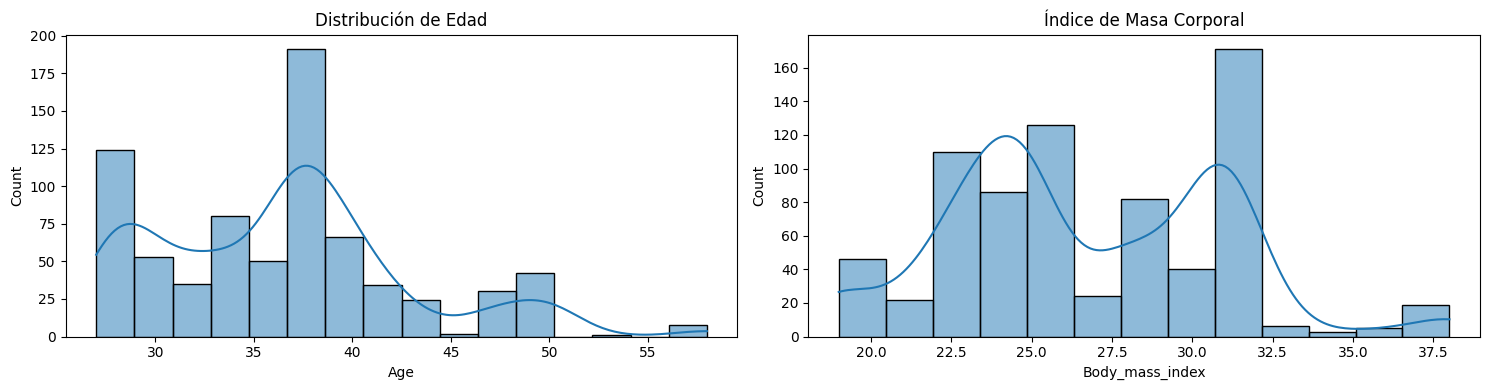

In [31]:
fig, axs = plt.subplots(1, 2, figsize=(15, 4))
sns.histplot(df_RRHH['Age'], kde=True, ax=axs[0])
axs[0].set_title("Distribución de Edad")

sns.histplot(df_RRHH['Body_mass_index'], kde=True, ax=axs[1])
axs[1].set_title("Índice de Masa Corporal")

plt.tight_layout()
plt.show()

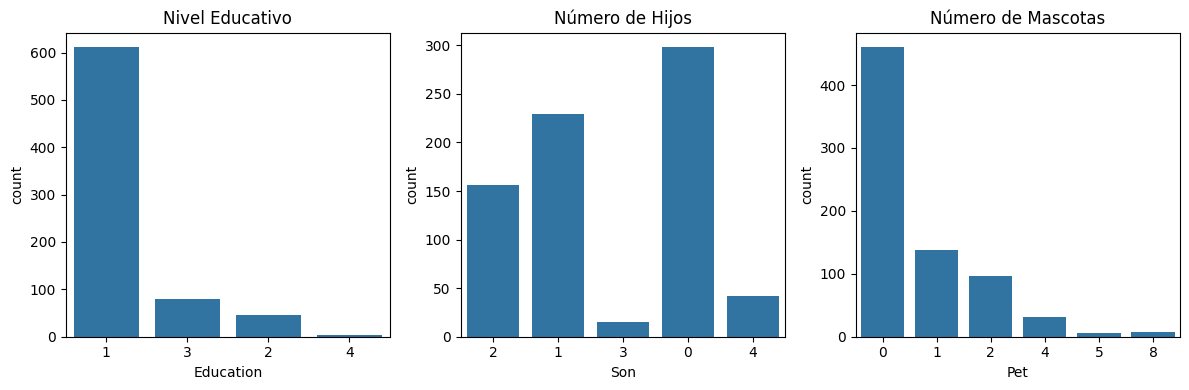

In [29]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
sns.countplot(x='Education', data=df_RRHH)
plt.title("Nivel Educativo")

plt.subplot(1, 3, 2)
sns.countplot(x='Son', data=df_RRHH)
plt.title("Número de Hijos")

plt.subplot(1, 3, 3)
sns.countplot(x='Pet', data=df_RRHH)
plt.title("Número de Mascotas")

plt.tight_layout()
plt.show()



* Análisis temporal del absentismo

<Axes: xlabel='Absenteeism_hours', ylabel='Count'>

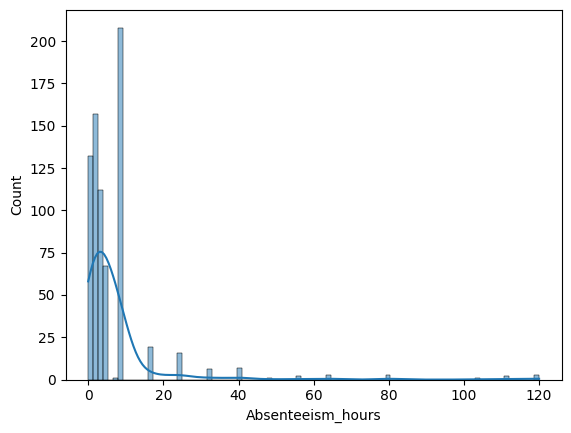

In [34]:
sns.histplot(df_RRHH['Absenteeism_hours'], kde=True)


<Axes: xlabel='Month_absence'>

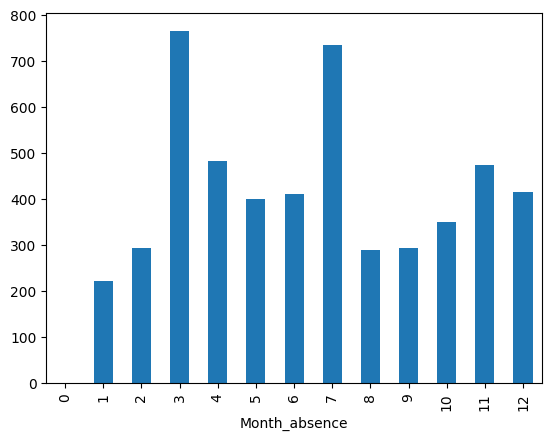

In [ ]:
df_RRHH.groupby('Month_absence')['Absenteeism_hours'].sum().plot(kind='bar')

# destacan Marzo y Abril

<Axes: xlabel='Day_week', ylabel='Absenteeism_hours'>

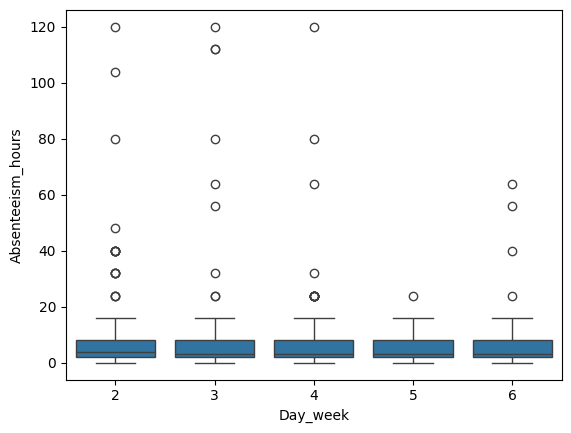

In [ ]:
sns.boxplot(x='Day_week', y='Absenteeism_hours', data=df_RRHH)

# No hay un día con absentismo sistemáticamente más alto
# Muchos outliers. Existen casos puntuales de ausencias prolongadas en todos los días
# Medianas casi iguales, El comportamiento del absentismo es bastante uniforme entre semana

<Axes: xlabel='Seasons', ylabel='Absenteeism_hours'>

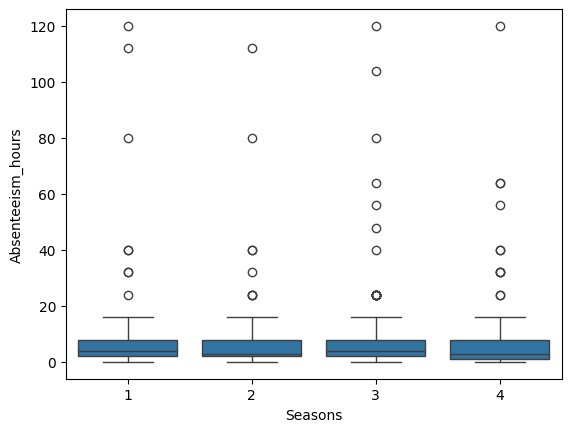

In [ ]:
sns.boxplot(x='Seasons', y='Absenteeism_hours', data=df_RRHH)

<Axes: xlabel='Education', ylabel='Absenteeism_hours'>

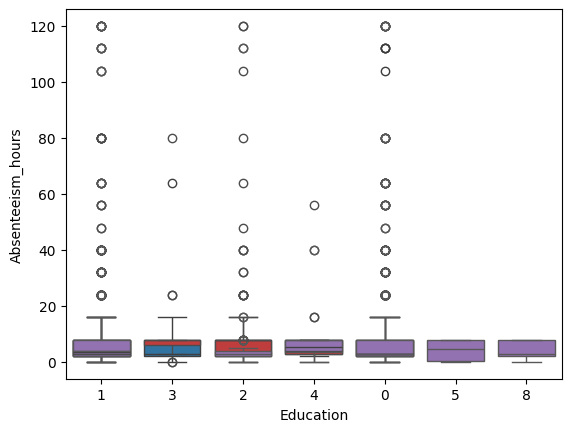

In [21]:
# Por educación
sns.boxplot(x='Education', y='Absenteeism_hours', data=df_RRHH)

# Social drinker / smoker
sns.boxplot(x='Social_drinker', y='Absenteeism_hours', data=df_RRHH)
sns.boxplot(x='Social_smoker', y='Absenteeism_hours', data=df_RRHH)

# Hijos o mascotas
sns.boxplot(x='Son', y='Absenteeism_hours', data=df_RRHH)
sns.boxplot(x='Pet', y='Absenteeism_hours', data=df_RRHH)

* Correlaciones entre variables numéricas

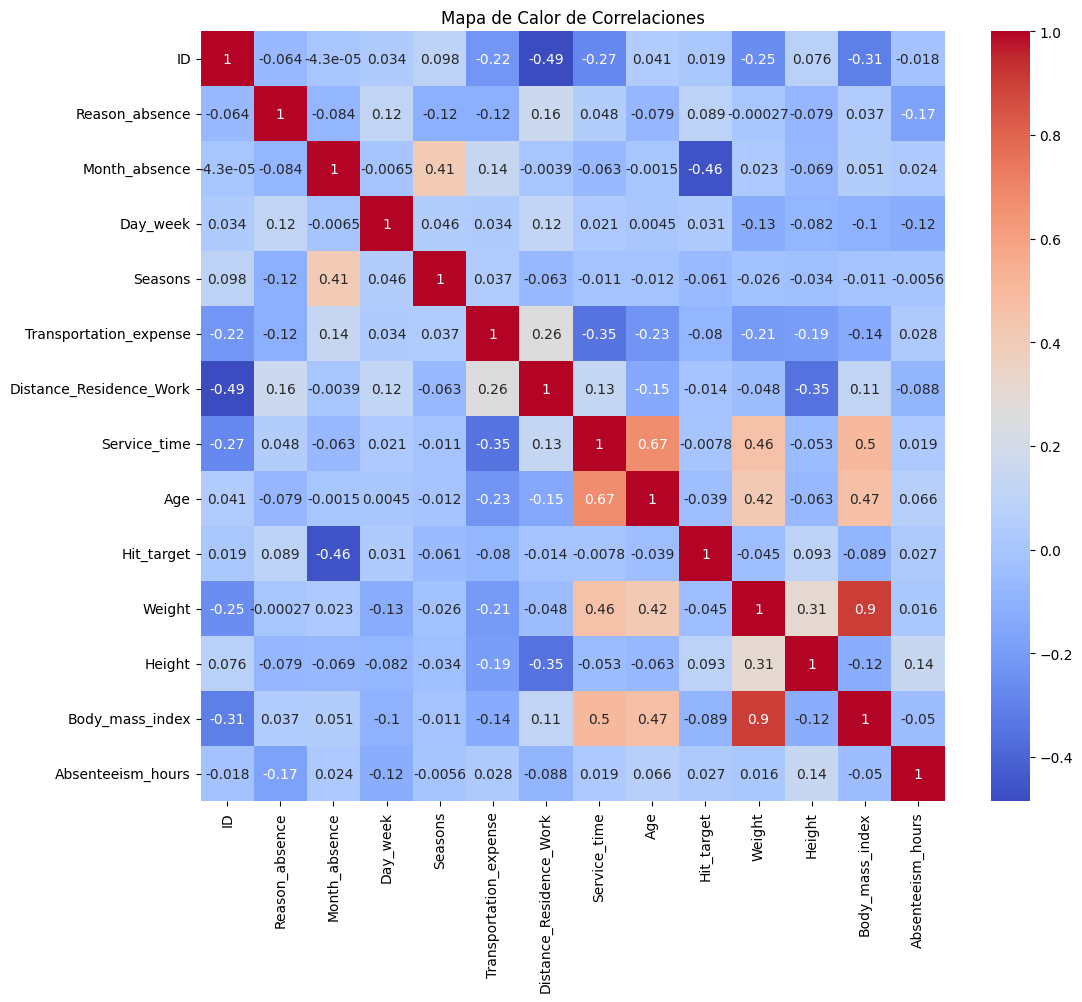

In [38]:
# Mapa de calor
plt.figure(figsize=(12, 10))
corr = df_RRHH.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Mapa de Calor de Correlaciones")
plt.show()
